In [1]:
# The code was removed by Watson Studio for sharing.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [2]:
who.to_csv()

",Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling\n0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.27962362,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.2592099999999,33736494.0,17.2,17.3,0.479,10.1\n1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52358168,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.47600000000000003,10.0\n2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.21924272,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9\n3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.18421529999999,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.46299999999999997,9.8\n4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097108703,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.5372310000

In [4]:
who.columns=['country','year','status','life_exp','adult_mort','infant_death','alcohol','perc_exp','hepa_b','measles','bmi','under_5_death','polio','total_exp','diphtheria','hiv','gdp','population','thinnes1_19','thinnes5_9','income_comp','schooling']

In [5]:
who

,country,year,status,life_exp,adult_mort,infant_death,alcohol,perc_exp,hepa_b,measles,...,polio,total_exp,diphtheria,hiv,gdp,population,thinnes1_19,thinnes5_9,income_comp,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [6]:
who=who.drop('year',axis=1)

In [7]:
status=pd.get_dummies(who.status)
who=pd.concat([who,status],axis=1)
who=who.drop(['status'],axis=1)
who.rename(columns={'Developing':0,'Developed':1})

,country,life_exp,adult_mort,infant_death,alcohol,perc_exp,hepa_b,measles,bmi,under_5_death,...,diphtheria,hiv,gdp,population,thinnes1_19,thinnes5_9,income_comp,schooling,1,0
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [8]:
who=who.groupby('country').mean()
who.head()

,life_exp,adult_mort,infant_death,alcohol,perc_exp,hepa_b,measles,bmi,under_5_death,polio,...,diphtheria,hiv,gdp,population,thinnes1_19,thinnes5_9,income_comp,schooling,Developed,Developing
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# EXPLORATORY DATA ANALYSIS


Using the scatter plot we plot the Life Expectancy against some other varyables to see if there is any correlation between them.
There seem to be a positive correlation between The Percentage of Healthcare Expenditure, Schooling, GDP and BMI and Life Expectancy, while there is a negative one between Adult Mortality, AIDS and Life Expectancy,there does not seem to have any correlation between Alcohol, under 5 years – old deaths and Life Expectancy.

In [9]:
who.columns

Index(['life_exp', 'adult_mort', 'infant_death', 'alcohol', 'perc_exp',
       'hepa_b', 'measles', 'bmi', 'under_5_death', 'polio', 'total_exp',
       'diphtheria', 'hiv', 'gdp', 'population', 'thinnes1_19', 'thinnes5_9',
       'income_comp', 'schooling', 'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'LIFE EXPECTANCY')

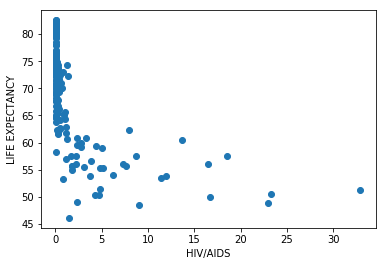

In [10]:
plt.scatter(who['hiv'],who['life_exp'])
plt.xlabel("HIV/AIDS")
plt.ylabel("LIFE EXPECTANCY")

Text(0, 0.5, 'LIFE EXPECTANCY')

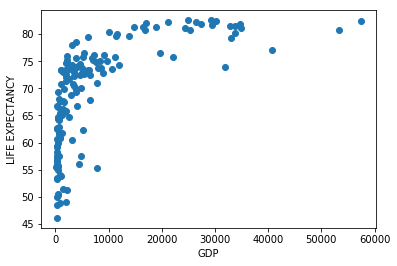

In [11]:
plt.scatter(who['gdp'],who['life_exp'])
plt.xlabel('GDP')
plt.ylabel('LIFE EXPECTANCY')


Text(0, 0.5, 'LIFE EXPECTANCY')

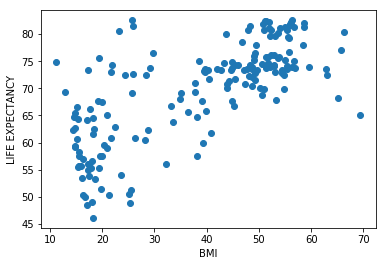

In [12]:
plt.scatter(who['bmi'],who['life_exp'])
plt.xlabel('BMI')
plt.ylabel('LIFE EXPECTANCY')

Text(0, 0.5, 'LIFE EXPECTANCY')

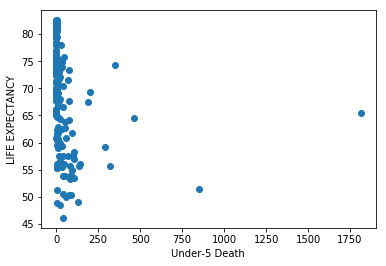

In [13]:
plt.scatter(who['under_5_death'],who['life_exp'])
plt.xlabel('Under-5 Death')
plt.ylabel('LIFE EXPECTANCY')

Text(0, 0.5, 'LIFE EXPECTANCY')

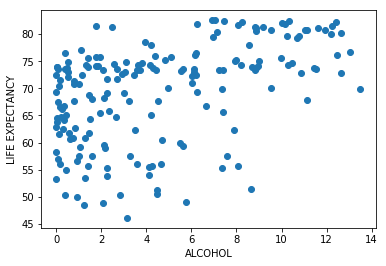

In [14]:
plt.scatter(who['alcohol'],who['life_exp'])
plt.xlabel('ALCOHOL')
plt.ylabel('LIFE EXPECTANCY')

Text(0, 0.5, 'LIFE EXPECTANCY')

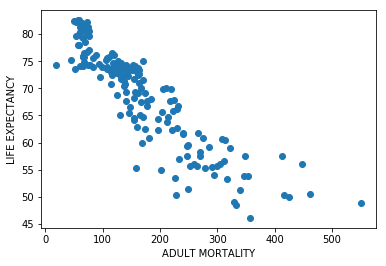

In [15]:
plt.scatter(who['adult_mort'],who['life_exp'])
plt.xlabel('ADULT MORTALITY')
plt.ylabel('LIFE EXPECTANCY')

Text(0, 0.5, 'LIFE EXPECTANCY')

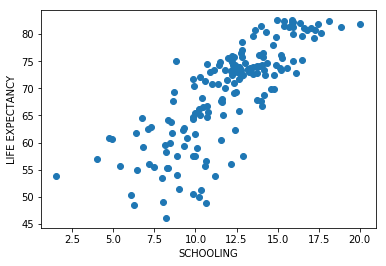

In [16]:
plt.scatter(who['schooling'],who['life_exp'])
plt.xlabel('SCHOOLING')
plt.ylabel('LIFE EXPECTANCY')

Text(0, 0.5, 'LIFE EXPECTANCY')

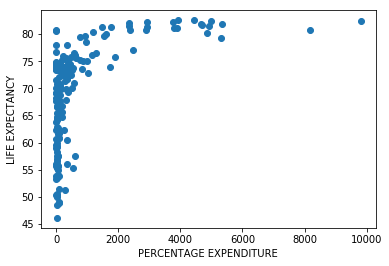

In [17]:
plt.scatter(who['perc_exp'],who['life_exp'])
plt.xlabel('PERCENTAGE EXPENDITURE')
plt.ylabel('LIFE EXPECTANCY')

Now we will plot the correlation matrix visulizing it with a heatmap. The legend tells that the warmer colors show higher and positive correlation, while the colder low or negative.
There is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

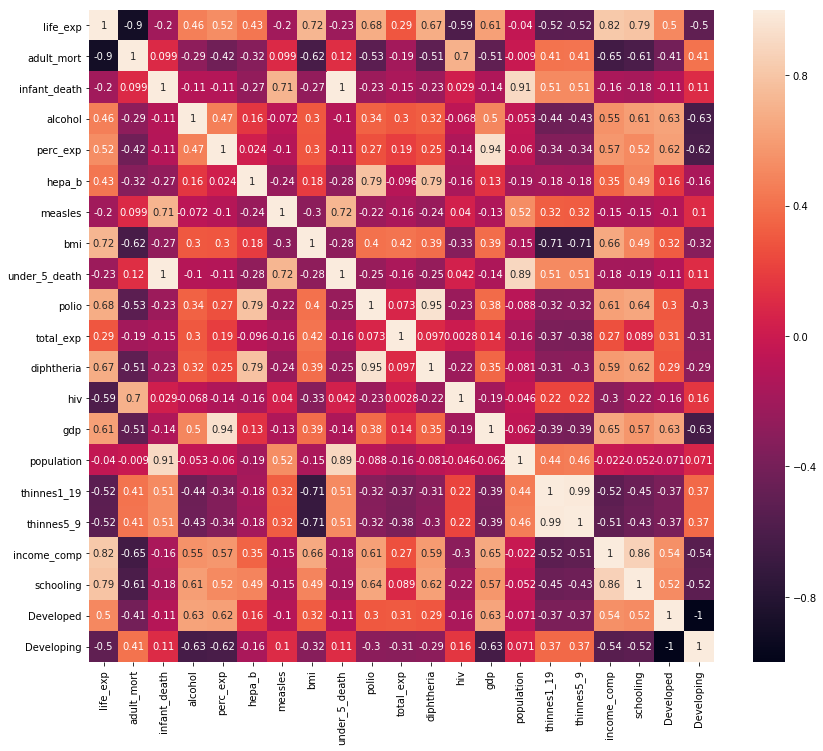

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(who.corr(),annot=True)

# DATA PREPROCESSING

The raw data is not suitable for us to start building a model so some preprocessing will be done. First the Status of the country is turned into numberical with the get_dummies function, so we get 2 new columns. The original column is being dropped. Second the data is being grouped by the country and we find the mean values during the 2000 – 2015 year period.
Then the Life expectancy column is removed to form the 'y' variable or the output, and the rest is stored as the 'X' variable. Now we consider that we have some null values in the table, the isnull function has been used to find the with the boolean True. Below that the number of null values are displayed in each separate column. It is mostly situated in the Population and GDP columns.
Now the missing values are filled with the mean of its respective column. This will create some distortions, but the other option in removing parts of the table will shrink the data so it will be avoided here because the number of rows is not that high. The final shape for the life_features is 193 rows to 20 columns. Finally considering the large differences in the values of the columns, there will be some scaling with the MinMaxScaler function.
Now we will split the data into a training part of 70% and a testing of 30%. Cross validation will be initialized with the creation of 5 fold split.

In [19]:
X=who.drop('life_exp',axis=1)
y=who['life_exp']

In [20]:
X.isnull().sum()

adult_mort       10
infant_death      0
alcohol           2
perc_exp          0
hepa_b            9
measles           0
bmi               4
under_5_death     0
polio             0
total_exp         2
diphtheria        0
hiv               0
gdp              30
population       48
thinnes1_19       4
thinnes5_9        4
income_comp      17
schooling        13
Developed         0
Developing        0
dtype: int64

In [21]:
y.isnull().sum()

10

In [22]:
X.fillna(value=X.mean(),inplace=True)

In [23]:
y.fillna(value=y.mean(),inplace=True)

In [24]:
X.isnull().sum()

adult_mort       0
infant_death     0
alcohol          0
perc_exp         0
hepa_b           0
measles          0
bmi              0
under_5_death    0
polio            0
total_exp        0
diphtheria       0
hiv              0
gdp              0
population       0
thinnes1_19      0
thinnes5_9       0
income_comp      0
schooling        0
Developed        0
Developing       0
dtype: int64

In [25]:
y.isnull().sum()

0

In [26]:
stats.describe(X[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [27]:
sc=MinMaxScaler()
X=sc.fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
X

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

# LINEAR REGRESSION

In [30]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print('R_square score on the training data: ',lin_reg.score(X_train,y_train))

R_square score on the training data:  0.9352215424167718


In [32]:
lin_reg_pred=lin_reg.predict(X_test)


In [33]:
print("Coefficients: ",lin_reg.coef_)
print("Mean Squared Error: ",mean_squared_error(y_test,lin_reg_pred))
print("Absolute Squared Error: ",mean_absolute_error(y_test,lin_reg_pred))
print("R_square Score: ",r2_score(y_test,lin_reg_pred))

Coefficients:  [-2.67815301e+01  8.02354048e+01  1.73664455e+00  3.05942058e+00
 -9.00830185e-01 -5.54139414e-03  1.87030471e+00 -9.05857442e+01
  2.19031403e-01  2.78009304e+00  5.00437366e+00 -3.64612946e+00
  7.66332943e-01  9.12565700e+00 -4.16408039e+00  3.64119027e+00
  7.26906595e+00  3.54256686e+00  2.11290236e-01 -2.11290236e-01]
Mean Squared Error:  7.687232298551874
Absolute Squared Error:  2.1060072097478297
R_square Score:  0.8985600432474037


Several algorithms will be tried out. First the classical linear regression.
The model is fitted first on the trained data the R square is 0.93 on the training data.Later its R square is checked on the testing data. The score is 89.85 % in the iteration of writing. We also calculate the MAE at 2.10 and the MSE at 7.68. Now we will try to have some changes to the initial model. We will use both the properties of the Ridge regression and the Lasso and eventually the ElasticNet to see if the score can be improved.

In [34]:
scoring=make_scorer(r2_score)
grid_cv=GridSearchCV(Ridge(),param_grid={'alpha':range(0,10),'max_iter':[10,100,1000]},scoring=scoring,cv=5,refit=True)
grid_cv.fit(X_train,y_train)
print("Best Parameters: "+str(grid_cv.best_params_))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.21809e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.36448e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.68047e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.21809e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.36448e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

Best Parameters: {'alpha': 1, 'max_iter': 10}


In [35]:
result=grid_cv.cv_results_

In [36]:
print('R_square score on the training data: ',grid_cv.score(X_train,y_train))
print("R_square Score: ",r2_score(y_test,grid_cv.best_estimator_.predict(X_test)))
print("Mean Squared Error: ",mean_squared_error(y_test,lin_reg_pred))  
print("Absolute Squared Error: ",mean_absolute_error(y_test,lin_reg_pred))


R_square score on the training data:  0.9178478906574984
R_square Score:  0.8617260432480975
Mean Squared Error:  7.687232298551874
Absolute Squared Error:  2.1060072097478297


The Ridge Regression uses L2 regularization to minimize the weights of the coefficients, this is controlled with the hyperparameter alpha. Increasing the value of alpha decreases the weights of the coefficients.
We performed a grid search with cross-validation on the grid regression with alpha varying between 0 and 10 and having 3 max iterations of 10, 100 and 1000. Finally the best parameters here are alpha = 1, and max iterations = 10.

In [73]:
scoring=make_scorer(r2_score)
grid_cv1=GridSearchCV(Lasso(),param_grid={'alpha':range(0,10),'max_iter':[10,100,1000]},scoring=scoring,cv=5,refit=True)
grid_cv1.fit(X_train,y_train)
print("Best Parameters: "+str(grid_cv1.best_params_))

Best Parameters: {'alpha': 0, 'max_iter': 100}


In [74]:
result=grid_cv1.cv_results_

In [75]:
print('R_square score on the training data: ',grid_cv1.score(X_train,y_train))
print("R_square Score: ",r2_score(y_test,grid_cv1.best_estimator_.predict(X_test)))
print("Mean Squared Error: ",mean_squared_error(y_test,lin_reg_pred))  
print("Absolute Squared Error: ",mean_absolute_error(y_test,lin_reg_pred))


R_square score on the training data:  0.9332592025858607
R_square Score:  0.8983649470432304
Mean Squared Error:  7.687232298551874
Absolute Squared Error:  2.1060072097478297


The Lasso Regression uses the L1 regularization which reduces some coefficent weights to zero. Again the regularization is controlled with aplha, decreasing it reduces the weights, also at the same time the max iterations hyperparameter needs to be increased.
The best parameters for the Lasso Regression are alpha = 0, and max iterations set to 100.

In [40]:
scoring=make_scorer(r2_score)
grid_cv=GridSearchCV(ElasticNet(),param_grid={'alpha':range(0,10),'max_iter':[10,100,1000],'l1_ratio':[0.1,0.4,0.8]},scoring=scoring,cv=5,refit=True)
grid_cv.fit(X_train,y_train)
print("Best Parameters: "+str(grid_cv.best_params_))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 100}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
result=grid_cv.cv_results_

In [42]:
print('R_square score on the training data: ',grid_cv.score(X_train,y_train))
print("R_square Score: ",r2_score(y_test,grid_cv.best_estimator_.predict(X_test)))
print("Mean Squared Error: ",mean_squared_error(y_test,lin_reg_pred))  
print("Absolute Squared Error: ",mean_absolute_error(y_test,lin_reg_pred))


R_square score on the training data:  0.9332592025858607
R_square Score:  0.8983649470432304
Mean Squared Error:  7.687232298551874
Absolute Squared Error:  2.1060072097478297


The ElasticNet combines both L1 and L2 regularization of the previous regression types.
Finally the grid search concerning ElasticNet shows that it performs as well as the Lasso regression so far with alpha = 0, max iterations = 100 and the L1 ration set at 0.1. The R square and the errors remain the same as the Lasso Regression.

# LINEAR REGRESSION WITH POLYNOMIAL FEATURES

The Polynomial Features function has been used to get the interactions of the input variables only to the power of 2.

In [43]:
quad_reg=PolynomialFeatures(2,interaction_only=True)
quad_reg.fit(X_train)
X_train_quad = quad_reg.transform(X_train)
X_test_quad=quad_reg.transform(X_test)

In [44]:
poly_reg=LinearRegression()
poly_reg.fit(X_train_quad,y_train)
score_poly=poly_reg.score(X_train_quad,y_train)
print("Accuracy: ",score_poly)

Accuracy:  1.0


The Linear Regression is being tested on the training data with the new Polynomial Features, the accuracy is 1, meaning the model has learned all the data. An prediction for the X_test_quad variable has been made.

In [45]:
poly_reg_predict=poly_reg.predict(X_test_quad)

In [46]:
print("Mean Squared Error: ",mean_squared_error(y_test,poly_reg_predict))
print("Mean Absolute Error: ",mean_absolute_error(y_test,poly_reg_predict))
print("R_Squared Score: ",r2_score(y_test,poly_reg_predict))

Mean Squared Error:  116.65438233657095
Mean Absolute Error:  7.302391502543343
R_Squared Score:  -0.5393596862490773


All the errors are significantly higher then the privious models, and the R square is in this case negative (this happens only in sklearn). This is the worst performing model for now.

# DECISION TREE REGRESSION

In [47]:
dt=DecisionTreeRegressor()
dt_fit=dt.fit(X_train,y_train)

In [48]:
dt_score=cross_val_score(dt_fit,X_train,y_train,cv=5)

In [49]:
print("Mean Cross Validation Score: ",np.mean(dt_score))
print("Score without CV: ",dt_fit.score(X_train,y_train))
print("R_square Score on the test Data: ",r2_score(y_test,dt_fit.predict(X_test)))

Mean Cross Validation Score:  0.8569618453160057
Score without CV:  1.0
R_square Score on the test Data:  0.7713204940643397


Now we will try the Decision Tree Regression. Cross Validation has been performed
The score on the training data is 1 meaning that the algorithm has learned the data by heart.

Now we use the algorithm to predict the values of the X_test.

In [50]:
dt_predict=dt.predict(X_test)

In [51]:
scoring=make_scorer(r2_score)
grid_cv=GridSearchCV(DecisionTreeRegressor(),param_grid={'min_samples_split':range(2,10)},scoring=scoring,cv=5,refit=True)
grid_cv.fit(X_train,y_train)
print("Best Parameters: ",str(grid_cv.best_params_))
result=grid_cv.cv_results_

Best Parameters:  {'min_samples_split': 4}


In [52]:
print("R_squared Score on Training Data: ",grid_cv.best_estimator_.score(X_train,y_train))
print("R_square Score: ",r2_score(y_test,grid_cv.best_estimator_.predict(X_test)))
print("Mean Squared Error: ",mean_squared_error(y_test,dt_predict))
print("Mean Absolute Error: ",mean_absolute_error(y_test,dt_predict))

R_squared Score on Training Data:  0.9975660613582498
R_square Score:  0.775452827965702
Mean Squared Error:  17.329586292439945
Mean Absolute Error:  2.9355603448275875


The R square on the training data is 99%, the algorithms has nearly leaned the data by hearth. On the test data we get R square of 86.45 %, the MAE is 2.11 and MSE is 8.27. This method is worse than the Elastic Net Regression.

# RANDOM FOREST REGRESSION

In [53]:
rf=RandomForestRegressor()
rf_fit=rf.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
rf_score=cross_val_score(rf_fit,X_train,y_train,cv=5)

In [56]:
print("Mean Cross Validation: ",np.mean(rf_score))
print("Score without CV: ",rf_fit.score(X_train,y_train))
print("R_squared on the test data: ",r2_score(y_test,rf_fit.predict(X_test)))

Mean Cross Validation:  0.9214795821807897
Score without CV:  0.9860459215761563
R_squared on the test data:  0.8301269720631547


The alogorithm has learned 97.8% on the training data without cross validation and 87.3% with, the value is 93 % on the test data.

In [57]:
rf_predict=rf.predict(X_test)
scoring=make_scorer(r2_score)
grid_cv=GridSearchCV(RandomForestRegressor(),param_grid={'min_samples_split':range(2,10)},scoring=scoring,cv=5,refit=True)
grid_cv.fit(X_train,y_train)
result=grid_cv.cv_results_

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

In [58]:
print("Best Parameters: ",str(grid_cv.best_params_))

Best Parameters:  {'min_samples_split': 5}


In [59]:
print("R_squared Score on Training Data: ",grid_cv.best_estimator_.score(X_train,y_train))
print("R_square Score: ",r2_score(y_test,grid_cv.best_estimator_.predict(X_test)))
print("Mean Squared Error: ",mean_squared_error(y_test,rf_predict))
print("Mean Absolute Error: ",mean_absolute_error(y_test,rf_predict))

R_squared Score on Training Data:  0.9836601044937134
R_square Score:  0.8364233245069754
Mean Squared Error:  12.873166243493104
Mean Absolute Error:  2.3923518466176756


The R square on the training is 97.35 % while on the test it is 93% and a MAE of 1.55 and MSE of 4.87.

# CONCLUSION

After comparing all the algorithms we can conclude the Lasso and the Elastic Net Regression offer which are the same:

Best Parameters: {‘alpha’: 0, ‘max_iter’: 100}
R square on the test data of 89.83%
MAE of 2.10
MSE of 7.68

In [61]:
!pip install watson-machine-learning-client

In [65]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [68]:
wml_credentials ={
  "apikey": "ReLV167mhx8A_KdYvQYfPNFSUqjnjl7v5joMUwm6IIF9",
   "instance_id": "eea09ff2-a7b6-4e4e-b9b1-3b41b3fdc8de",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [69]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [70]:
model_props={ client.repository.ModelMetaNames.AUTHOR_NAME: "DIXITA",
              client.repository.ModelMetaNames.AUTHOR_EMAIL: "dixitashukla25@gmail.com",
              client.repository.ModelMetaNames.NAME: "Life Expectancy Prediction"}

In [76]:
model_artifact=client.repository.store_model(grid_cv,meta_props=model_props)

In [77]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [78]:
published_model_uid

'63b54f2e-5b49-43e5-923c-12edf3838797'

In [79]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy Prediction")



#######################################################################################

Synchronous deployment creation for uid: '63b54f2e-5b49-43e5-923c-12edf3838797' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5d89b387-57c0-409c-935f-b5c6bd4cec1d'
------------------------------------------------------------------------------------------------




In [80]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [81]:
@hidden cell
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eea09ff2-a7b6-4e4e-b9b1-3b41b3fdc8de/deployments/5d89b387-57c0-409c-935f-b5c6bd4cec1d/online'